#  Model Development

<p> developing several models that will predict the price of the car using the variables or features. This is just an estimate but it gives us an objective idea of how much the car should cost.</p>

Some questions we want to ask in this module
<ul>
    <li>do I know if the dealer is offering fair value for my trade-in?</li>
    <li>do I know if I put a fair value on my car?</li>
</ul>
<p>Data Analytics, we often use <b>Model Development</b> to help us predict future observations from the data we have.</p>

<p>A Model will help us understand the exact relationship between different variables and how these variables are used to predict the result.</p>

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [274]:
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [275]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<h4>How could Highway-mpg help us predict car price?</h4>

In [276]:
X=df[['highway-mpg']]
Y=df[['price']]

In [277]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [278]:
Yhat=lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

<h4>Value of intercept 'a'</h4>

In [279]:
a=lm.intercept_

In [280]:
a

array([38423.30585816])

<h4>Value of slope 'b'</h4>

In [281]:
b=lm.coef_

In [282]:
b

array([[-821.73337832]])

In [283]:
# Yhat=a+b*X

In [284]:
# Yhat

In [285]:
Lm1=LinearRegression()
Lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [286]:
Lm1.fit(df[['engine-size']],df[['price']])
Lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [287]:
a_intercept_of_engine_size=Lm1.intercept_

In [288]:
a_intercept_of_engine_size

array([-7963.33890628])

In [289]:
b_slope_of_engine_size = Lm1.coef_

In [290]:
b_slope_of_engine_size

array([[166.86001569]])

In [291]:
# Yhat=-7963.33890628+166.86001569*X

In [292]:
# Yhat

<h4>Multiple Linear Regression</h4>

<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>


In [293]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [294]:
Z

,horsepower,curb-weight,engine-size,highway-mpg
0,111.0,2548,130,27
1,111.0,2548,130,27
2,154.0,2823,152,26
3,102.0,2337,109,30
4,115.0,2824,136,22
5,110.0,2507,136,25
6,110.0,2844,136,25
7,110.0,2954,136,25
8,140.0,3086,131,20
9,101.0,2395,108,29


In [295]:
lm.fit(Z,df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<h4>Value of intercept 'a'</h4>

In [296]:
lm.intercept_

-15806.624626329198

<h4>Value of slope 'b'  </h4>

In [297]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [298]:
# X1=df[['horsepower']]
# X2=df[['curb-weight']]
# X3=df[['engine-size']]
# X4=df[['highway-mpg']]

In [299]:
# b1,b2,b3,b4=[53.49574423,  4.70770099, 81.53026382, 36.05748882]

In [300]:
lm2=LinearRegression()
# lm2.fit(df[['normalized-losses' , 'highway-mpg']],df[['price']])
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [301]:
lm2.coef_

array([   1.49789586, -820.45434016])

In [302]:
lm2.intercept_

38201.31327245728

<h3>Model Evaluation using Visualization</h3>

In [303]:
import seaborn as sns
%matplotlib inline

(0, 48277.508165603314)

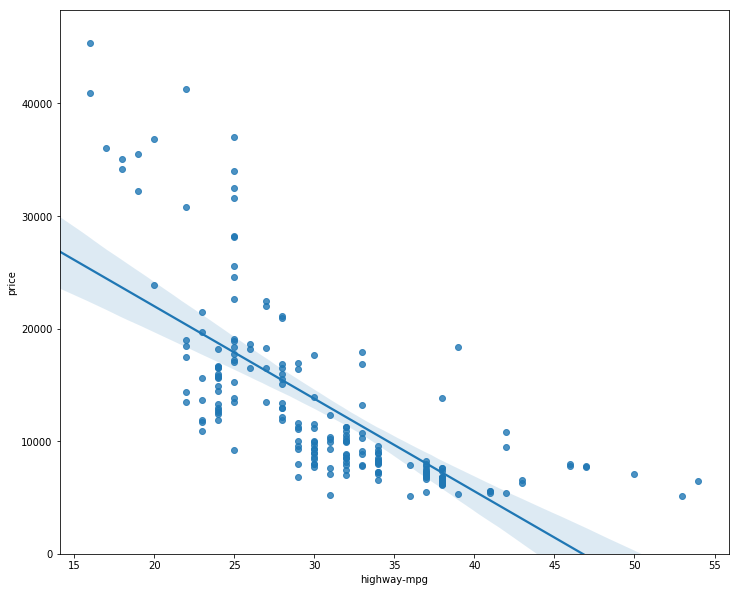

In [304]:
width=12
height=10

plt.figure(figsize= (width,height) )
sns.regplot(x='highway-mpg',y='price',data=df)
plt.ylim(0,)

<p>We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative.
One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data. Let's compare this plot to the regression plot of "peak-rpm".</p>

(0, 47422.919330307624)

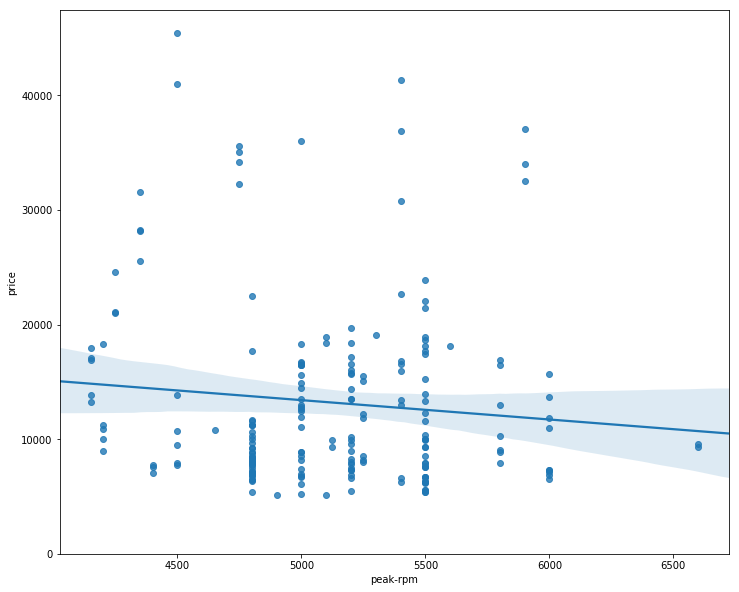

In [305]:
plt.figure(figsize= (width,height) )
sns.regplot(x='peak-rpm',y='price',data=df)
plt.ylim(0,)

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.</p>

In [306]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>

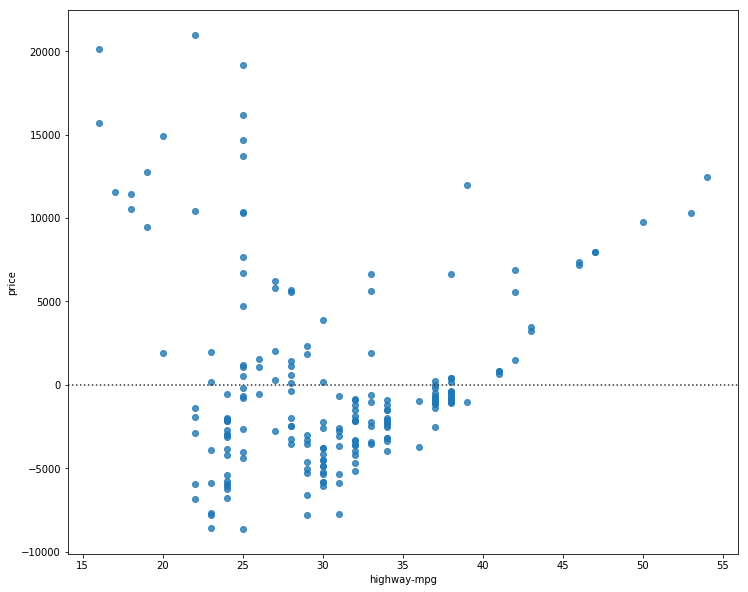

In [307]:
plt.figure(figsize=(width,height))
sns.residplot(df['highway-mpg'],df['price'])
plt.show()

<i>What is this plot telling us?</i>

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.</p>

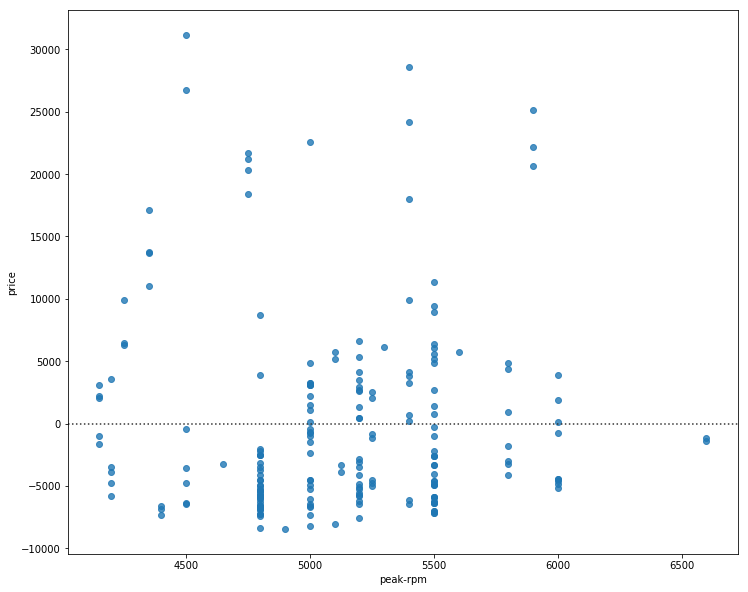

In [308]:
plt.figure(figsize=(width,height))
sns.residplot(df['peak-rpm'],df['price'])
plt.show()

<h3>Multiple Linear Regression</h3>

In [309]:
Y_hat=lm.predict(Z)


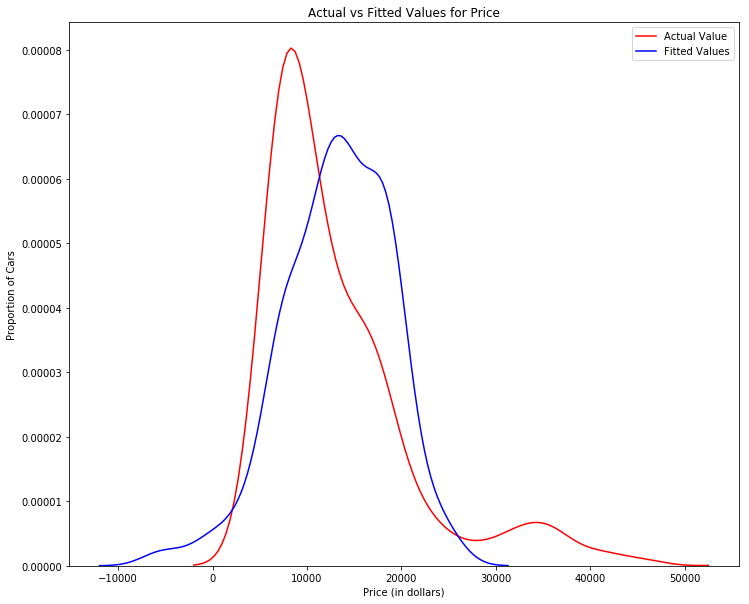

In [310]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>

<h2> Polynomial Regression and Pipelines</h2>

<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>

<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 
$$


<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 +b_3 X^3\\
$$


<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....\\
$$

<p>We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.</p>

In [312]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

lets get the variables

In [317]:
x=df['highway-mpg']
y=df['price']

Let's fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.

In [320]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


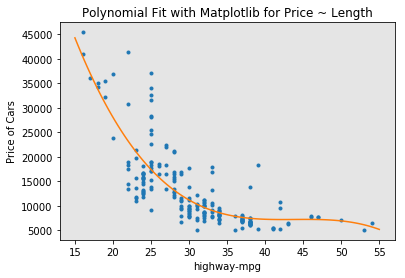

In [322]:
PlotPolly(p, x, y, 'highway-mpg')

In [323]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>

In [324]:
f1=np.polyfit(x,y,11)
p1 = np.poly1d(f1)
print(p1)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


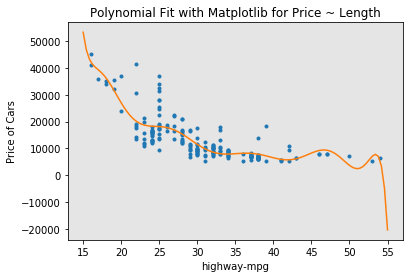

In [325]:
PlotPolly(p1,x,y,'highway-mpg')

<p>The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2)polynomial with two variables is given by:</p>

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$

In [326]:
from sklearn.preprocessing import PolynomialFeatures

In [327]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [330]:
Z_pr=pr.fit_transform(Z)

The original data is of 201 samples and 4 features 

In [331]:
Z.shape

(201, 4)

after the transformation, there 201 samples and 15 features

In [333]:
Z_pr.shape

(201, 15)

<h2>Pipeline</h2>


<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>

In [334]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [335]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [337]:
pipe= Pipeline(Input)
pipe


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

We can normalize the data,  perform a transform and fit the model simultaneously. 

In [338]:
pipe.fit(Z,y)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

 Similarly,  we can normalize the data, perform a transform and produce a prediction  simultaneously

In [340]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [342]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]
pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

<h1> Measures for In-Sample Evaluation</h1>

<h3>R-Squared Value of Simple Linear Regression</h3>

In [369]:
lm.fit(X,Y)
print('The R-Squared is : ', lm.score(X,Y))

The R-Squared is :  0.4965911884339175


We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

Let's calculate the MSE


We can predict the output i.e., "yhat" using the predict method, where X is the input variable:

In [347]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: \n', Yhat[0:4])

The output of the first four predicted value is: 
 [[16236.50464347]
 [16236.50464347]
 [17058.23802179]
 [13771.3045085 ]]


In [348]:
from sklearn.metrics import mean_squared_error

we compare the predicted results with the actual results 

<h3> MSE of Simple Linear Regression</h3>

In [372]:
mse=mean_squared_error(df['price'],Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


<h3> Multiple Linear Regression</h3>

<h3>R-Squared Value of Multiple Linear Regression</h3>

In [350]:
lm.fit(Z,df['price'])
print('R-Square is : ',lm.score(Z,df['price']))

R-Square is :  0.8093562806577457


We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

In [354]:
Y_predict_multifit=lm.predict(Z)

<h3>MSE of Multiple Linear Regression</h3>

In [373]:
print('The mean square error of price and predicted value using multifit is: ', 
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


<h3>Polynomial fit</h3>

Let's calculate the R^2




let’s import the function <b>r2_score</b> from the module <b>metrics</b> as we are using a different function

In [357]:
from sklearn.metrics import r2_score

<h3>R-Squared value of the Polynomial fit</h3>

In [374]:
r_squared = r2_score(y,p(x))
print('The R-Squared value is : ',r_squared)

The R-Squared value is :  0.674194666390652


<h3>MSE</h3>

We can also calculate the mse

In [375]:
mean_squared_error(df['price'],p(x))

20474146.426361218

<h2>Part 5: Prediction and Decision Making</h2>
<h3>Prediction</h3>

In [361]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [364]:
new_input = np.arange(1,100,1).reshape(-1,1)

In [366]:
lm.fit(X,Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [367]:
yhat=lm.predict(new_input)
yhat[0:5]

array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655]])

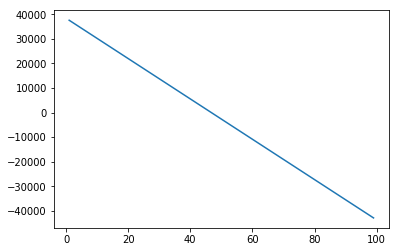

In [371]:
plt.plot(new_input,yhat)
plt.show()

<h3>Decision Making: Determining a Good Model Fit</h3>

<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>

<h3>Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)</h3>

<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, you should always check the MSE and R^2.</p>

<p>So to be able to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.

<h3>Simple Linear Model (SLR) vs Polynomial Fit</h3>

<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.</p>

<h3>Multiple Linear Regression (MLR) vs Polynomial Fit</h3>

<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>

<h2>Conclusion:</h2>


<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.</p>